# Pizza Sales Analysis

### Data Science & Visualization Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

### Import Data

In [103]:
df = pd.read_excel("C:\\Users\\Dell\\OneDrive\\Desktop\\STATISTICS\\Data analysis\\Data Tutorials Youtube\\Pizza sales\\pizza_sales_excel_file.xlsx")

### See the data

In [79]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [80]:
round(df.describe(), 2)

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48620.00,48620.00,48620.00,48620,48620.00,48620.00
mean,24310.50,10701.48,1.02,2015-06-29 11:03:43.611682560,16.49,16.82
min,1.00,1.00,1.00,2015-01-01 00:00:00,9.75,9.75
25%,12155.75,5337.00,1.00,2015-03-31 00:00:00,12.75,12.75
50%,24310.50,10682.50,1.00,2015-06-28 00:00:00,16.50,16.50
75%,36465.25,16100.00,1.00,2015-09-28 00:00:00,20.25,20.50
max,48620.00,21350.00,4.00,2015-12-31 00:00:00,35.95,83.00
std,14035.53,6180.12,0.14,NaN,3.62,4.44


In [81]:
df.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [82]:
df.shape

(48620, 12)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [84]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0             1         1     hawaiian_m         1 2015-01-01   11:38:36   
1             2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2             3         2  five_cheese_l         1 2015-01-01   11:57:40   
3             4         2    ital_supr_l         1 2015-01-01   11:57:40   
4             5         2     mexicana_m         1 2015-01-01   11:57:40   
...         ...       ...            ...       ...        ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   21:23:10   
48616     48617     21348  four_cheese_l         1 2015-12-31   21:23:10   
48617     48618     21348   napolitana_s         1 2015-12-31   21:23:10   
48618     48619     21349     mexicana_l         1 2015-12-31   22:09:54   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   23:02:05   

       unit_price  total_price pizza_size pizza_categor

In [85]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [86]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

### Key Performance Indicators (KPIs)
##### Total Revenue = Sum of total_price
##### Total Pizzas Sold = Sum of quantity
##### Total Orders = Count of unique order_id
##### Average Order Value (AOV) = Total Revenue ÷ Total Orders
##### Average Pizza per Order = Total Pizzas Sold ÷ Total Orders


In [87]:
KPIs = {
    'Total Revenue': df['total_price'].sum(),
    'Total Pizzas Sold': df['quantity'].sum(),           
    'Total Orders': df['order_id'].nunique(),
    'Average Order Value': df['total_price'].sum() / df['order_id'].nunique(),
    'Average Pizzas per Order': df['quantity'].sum() / df['order_id'].nunique()
}

for k, v in KPIs.items():
    print(f"{k}: {v:,.2f}")

Total Revenue: 817,860.05
Total Pizzas Sold: 49,574.00
Total Orders: 21,350.00
Average Order Value: 38.31
Average Pizzas per Order: 2.32


### Ingredient Analysis


In [88]:
ingredient = (
    df['pizza_ingredients']
    .str.split(",")
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index':'Count', 'pizza_ingredients': 'Ingredients'})
)
ingredient.shape

(65, 2)

In [89]:
ingredient.head(20)

,Ingredients,count
0,Garlic,27422
1,Tomatoes,26601
2,Red Onions,19547
3,Red Peppers,16284
4,Mozzarella Cheese,10333
5,Pepperoni,10300
6,Spinach,10012
7,Mushrooms,9624
8,Chicken,8443
9,Capocollo,6572


In [90]:
ingredient.tail(20)

,Ingredients,count
45,Prosciutto di San Daniele,1428
46,Genoa Salami,1422
47,Oregano,1414
48,Beef Chuck Roast,1406
49,Provolone Cheese,1359
50,Smoked Gouda Cheese,1359
51,Romano Cheese,1359
52,Blue Cheese,1359
53,Alfredo Sauce,980
54,Eggplant,975


### Daily Trend


In [91]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)    # Converts the order_date column from string format to Python datetime objects
df['day_name'] = df['order_date'].dt.day_name()       # Extract Day Name
weekday_order  = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
df['day_name'] = pd.Categorical(df['day_name'], categories=weekday_order, ordered=True)   # Converts the day names to a categorical data type
orders_by_day = df.groupby('day_name', observed=False)['order_id'].nunique()    

'''

 .groupby('day_name'): Groups the dataframe by each unique day name

 observed=False: Ensures all 7 days appear in results (even if some have 0 orders)

 ['order_id'].nunique(): For each day, counts unique order IDs

'''
orders_by_day

day_name
Monday       2794
Tuesday      2973
Wednesday    3024
Thursday     3239
Friday       3538
Saturday     3158
Sunday       2624
Name: order_id, dtype: int64

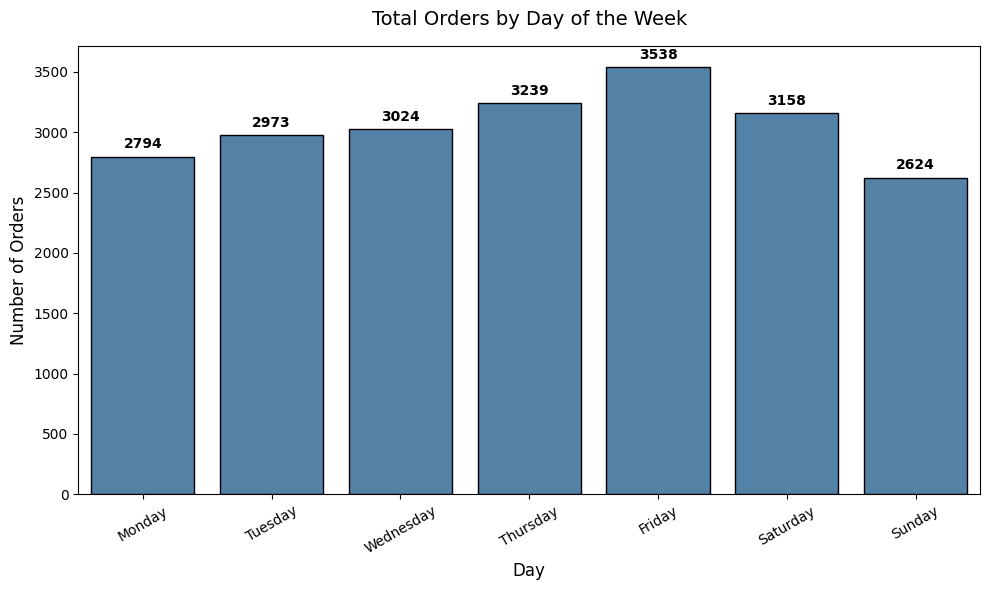

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=orders_by_day.index,
    y=orders_by_day.values,
    color='steelblue',
    edgecolor='black'
)
plt.title("Total Orders by Day of the Week", fontsize=14, pad=15)
plt.xlabel("Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=30)

# Add value labels
for i, v in enumerate(orders_by_day):
    plt.text(i, v + max(orders_by_day)*0.02, str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<Axes: xlabel='day_name', ylabel='order_id'>

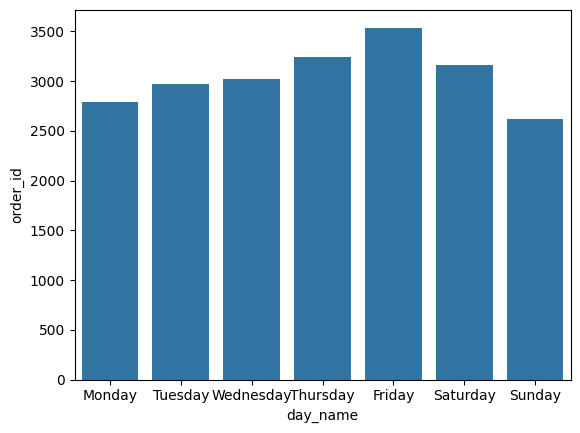

In [93]:
sns.barplot(orders_by_day)

### Hourly Trend

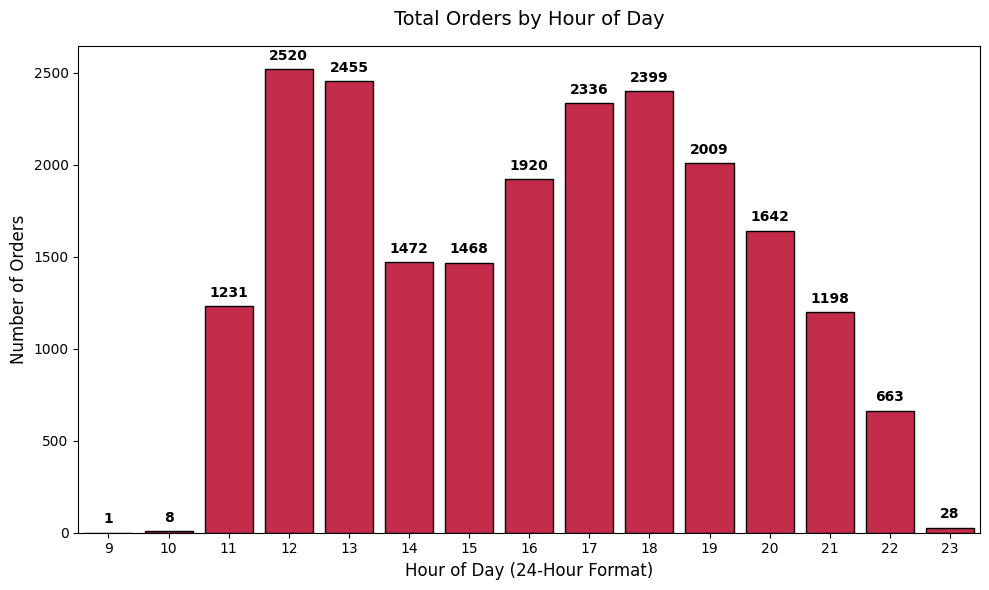

In [94]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')    # Converts the order_date column from string format to Python datetime objects
df['order_hour'] = df['order_time'].dt.hour       # Extract Day Name
orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()    

plt.figure(figsize=(10,6))
sns.barplot(
    x=orders_by_hour.index,
    y=orders_by_hour.values,
    color='crimson',
    edgecolor='black'
)
plt.title("Total Orders by Hour of Day", fontsize=14, pad=15)
plt.xlabel("Hour of Day (24-Hour Format)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks()

# Add value labels
for i, v in enumerate(orders_by_hour):
    plt.text(i, v + max(orders_by_hour)*0.02, str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Monthly Trend

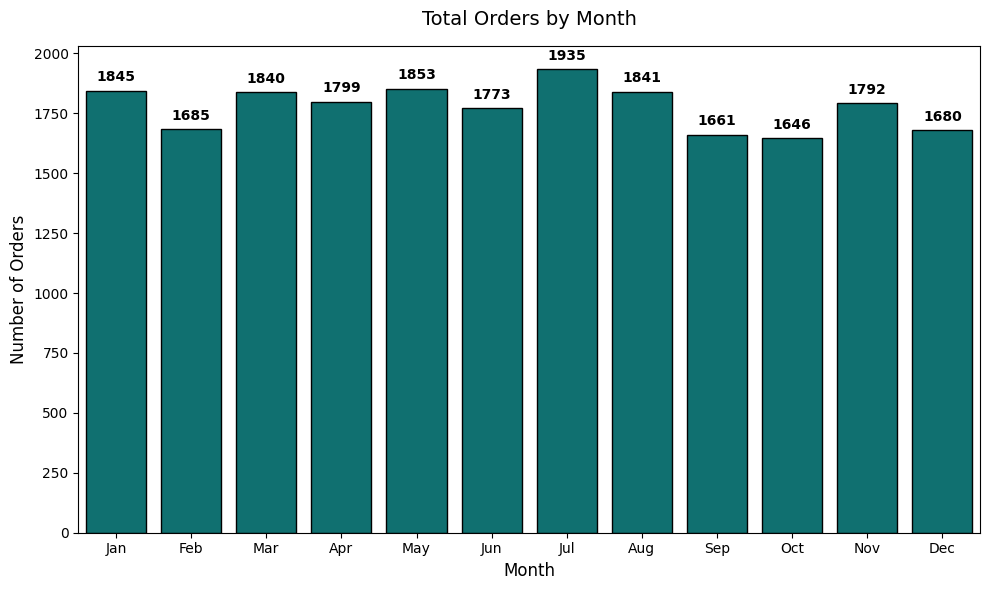

In [95]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

# Extract abbreviated month names
df['month_name'] = df['order_date'].dt.strftime('%b')

# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert to categorical with proper ordering
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Group by month - FIXED: added observed=True
orders_by_month = df.groupby('month_name', observed=True)['order_id'].nunique()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x=orders_by_month.index,
    y=orders_by_month.values,
    color='teal',
    edgecolor='black'
)
plt.title("Total Orders by Month", fontsize=14, pad=15)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks()

# Add value labels
for i, v in enumerate(orders_by_month):
    plt.text(i, v + max(orders_by_month)*0.02, str(v), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### % of Sales by Category

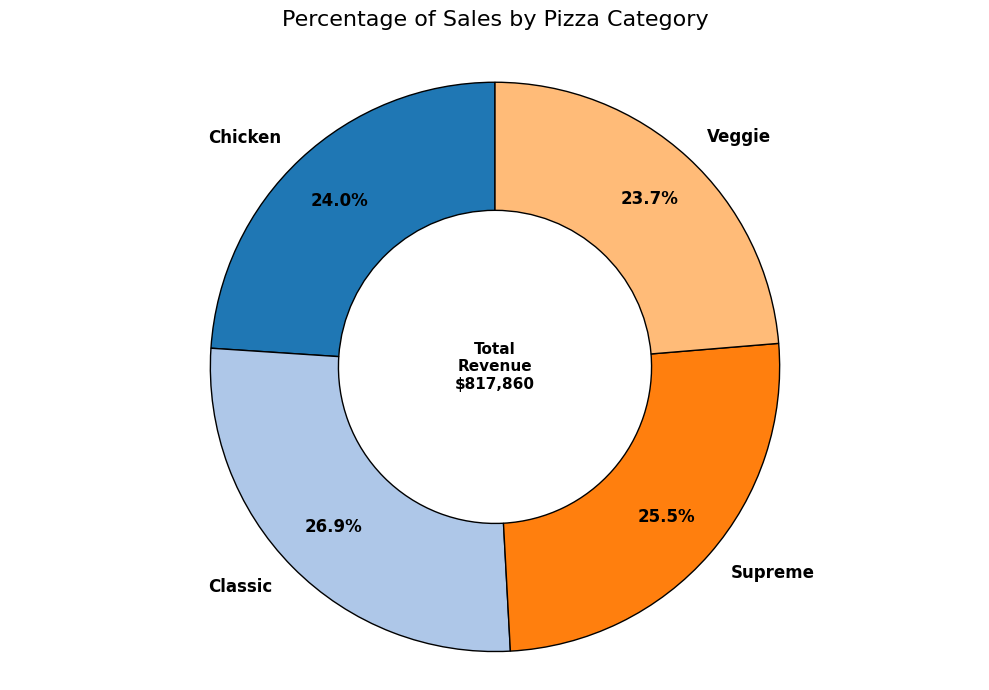

In [96]:
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(10, 7))  

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.get_cmap('tab20').colors,
    wedgeprops={'width': 0.45, 'edgecolor': 'black'},  # donut + border
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    pctdistance=0.80,           # place % inside the donut ring
    labeldistance=1.1           # move category names a bit outside
)

plt.title("Percentage of Sales by Pizza Category", fontsize=16, pad=20)
plt.axis('equal')  # makes sure pie is perfectly round

# Optional: add total revenue in the center
total_rev = f"${category_sales.sum():,.0f}"
plt.text(0, 0, f"Total\nRevenue\n{total_rev}", 
         ha='center', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

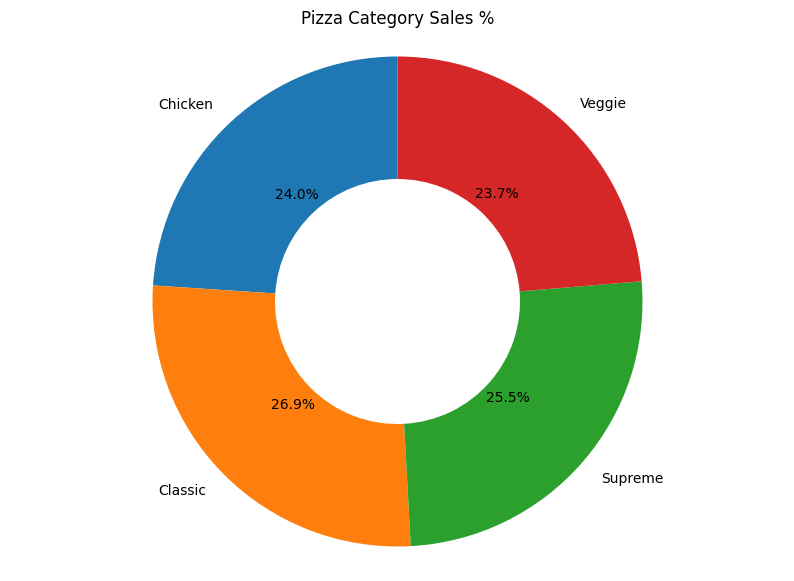

In [97]:
sales = df.groupby('pizza_category')['total_price'].sum()
plt.figure(figsize=(10, 7))
plt.pie(sales, labels=sales.index, autopct='%1.1f%%', 
        wedgeprops={'width':0.5}, startangle=90)
plt.title("Pizza Category Sales %")
plt.axis('equal')
plt.show()

### % Sales by Pizza Size & Category


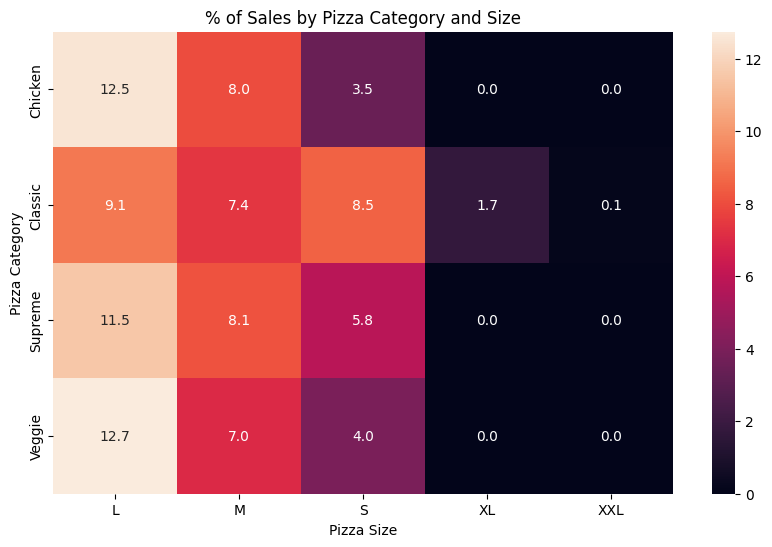

In [98]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot/ sales_pivot.sum().sum()*100

plt.figure(figsize=(10,6))
sns.heatmap(sales_pct, annot = True, fmt=".1f")
plt.title("% of Sales by Pizza Category and Size")
plt.ylabel("Pizza Category")
plt.xlabel("Pizza Size")
plt.show()

### Total Pizzas Sold by Pizza Category

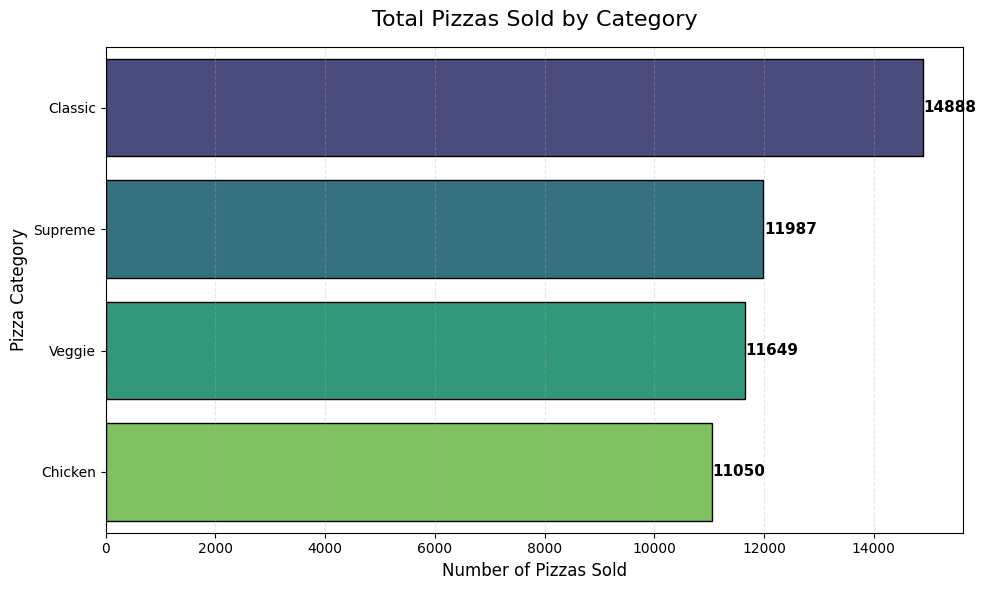

In [99]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))

sns.barplot(
    x=pizzas_by_category.values,
    y=pizzas_by_category.index,
    hue=pizzas_by_category.index,       # assign hue to the same variable as y
    palette='viridis',                  
    edgecolor='black'                   # optional: nicer look
)

plt.title('Total Pizzas Sold by Category', fontsize=16, pad=15)
plt.xlabel('Number of Pizzas Sold', fontsize=12)
plt.ylabel('Pizza Category', fontsize=12)

# Add value labels (same as before)
for i, v in enumerate(pizzas_by_category):
    plt.text(v + 10, i, str(int(v)), va='center', fontsize=11, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Top 5 Best-Selling Pizzas


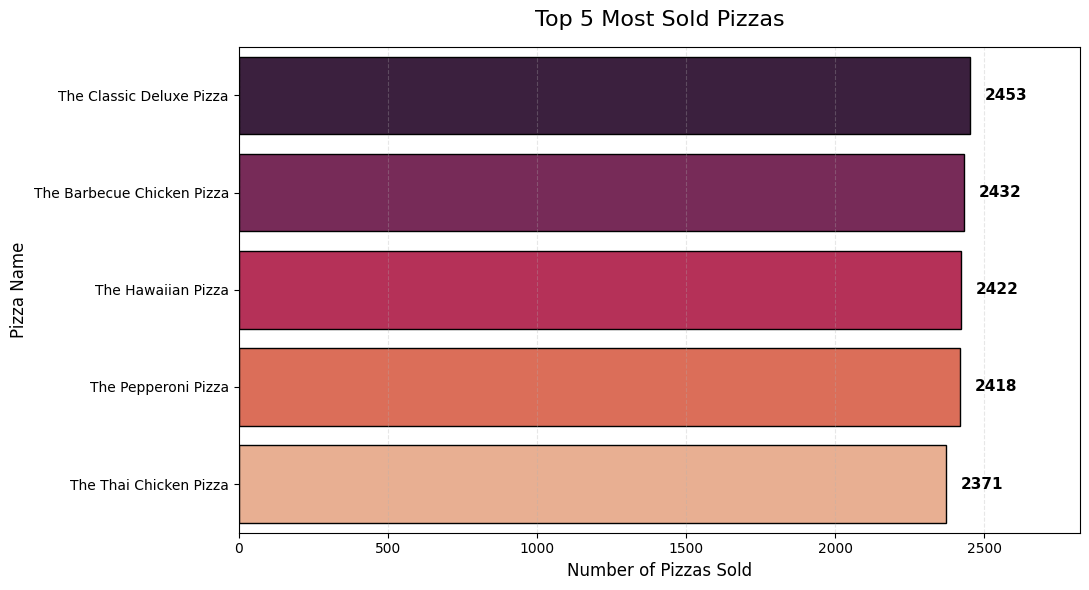

In [100]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()
top5 = pizzas_by_name.sort_values(ascending=False).head(5)

plt.figure(figsize=(11, 6))

sns.barplot(
    x=top5.values,
    y=top5.index,
    hue=top5.index,          # modern seaborn fix
    palette='rocket',        # nice gradient colors
    legend=False,
    edgecolor='black'
)

# Add value labels with safe spacing
max_val = top5.max()
offset = max_val * 0.02   # 2% of max value

for i, v in enumerate(top5):
    plt.text(
        v + offset,
        i,
        str(int(v)),
        va='center',
        fontsize=11,
        fontweight='bold'
    )

# Make sure labels don't go outside
plt.xlim(0, max_val * 1.15)

plt.title('Top 5 Most Sold Pizzas', fontsize=16, pad=15)
plt.xlabel('Number of Pizzas Sold', fontsize=12)
plt.ylabel('Pizza Name', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Lowest Selling Pizzas (Bottom 5)

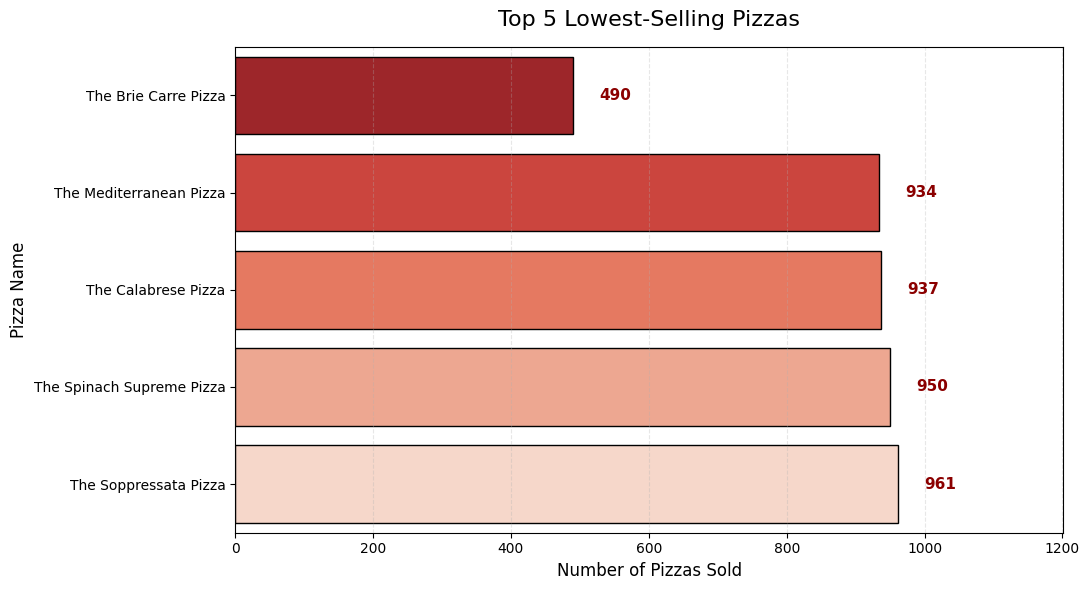

In [101]:
bottom5 = pizzas_by_name.sort_values(ascending=True).head(5)
plt.figure(figsize=(11, 6))

sns.barplot(
    x=bottom5.values,
    y=bottom5.index,
    hue=bottom5.index,
    palette='Reds_r',           # red tones → indicates "low"/warning
    legend=False,
    edgecolor='black'
)

# Add value labels safely
max_val = bottom5.max() if len(bottom5) > 0 else 1
offset = max_val * 0.04     # slightly more space since numbers are small

for i, v in enumerate(bottom5):
    plt.text(
        v + offset,
        i,
        str(int(v)),
        va='center',
        fontsize=11,
        fontweight='bold',
        color='darkred'
    )

# Extra right margin for labels
plt.xlim(0, max_val * 1.25)

plt.title('Top 5 Lowest-Selling Pizzas', fontsize=16, pad=15)
plt.xlabel('Number of Pizzas Sold', fontsize=12)
plt.ylabel('Pizza Name', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()